# Simple Moving Average On Trading FaceBook
## __IMPORTANT: This project is 100% done by Max Hong Ka Ho serving as academic study of the stock market and any results in this project should not be treated as investment advices for any individuals__

## Simple Moving Average Formula:
### It takes in the value of the past n periods of stock price and then calculate the mean in the rolling window method
### Formula:
### $MA_t = (x_t + x_{t-1} + ... + x_{t-n+1})/n$
### where $x_i$ denotes the stock price at the $i^{th}$ period

## How to trade with simple moving average?
### Method 1: Moving average crossover
### the shorter moving average is called fast signal while the longer moving average is called slow signal. When the fast signal crosses throught the slow signal from down to above, it indicates the current momentum of stock is rising which render a buying entry signal for us

### Method 2: Trend Filtering
### The moving average can be viewed as a smoothing price of the stock. The moving average trend can somehow review the underlying trend of the stock in general. When the stock price is standing above the MA, we would likely to think that the stock price is in the bull market(rising) since it is performing above average and we would try to buy the stocks

### In this project, I would utilize on the past facebook prices ranging from 2013 - 2020 for experiment to test the above strategies

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read the stock price of FB
fb = pd.read_csv("FB.csv").dropna()
fb.index = pd.to_datetime(fb.Date)
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2013-01-02,2013-01-02,27.440001,28.180000,27.420000,28.000000,28.000000,69846400
2013-01-03,2013-01-03,27.879999,28.469999,27.590000,27.770000,27.770000,63140600
2013-01-04,2013-01-04,28.010000,28.930000,27.830000,28.760000,28.760000,72715400
2013-01-07,2013-01-07,28.690001,29.790001,28.650000,29.420000,29.420000,83781800
2013-01-08,2013-01-08,29.510000,29.600000,28.860001,29.059999,29.059999,45871300


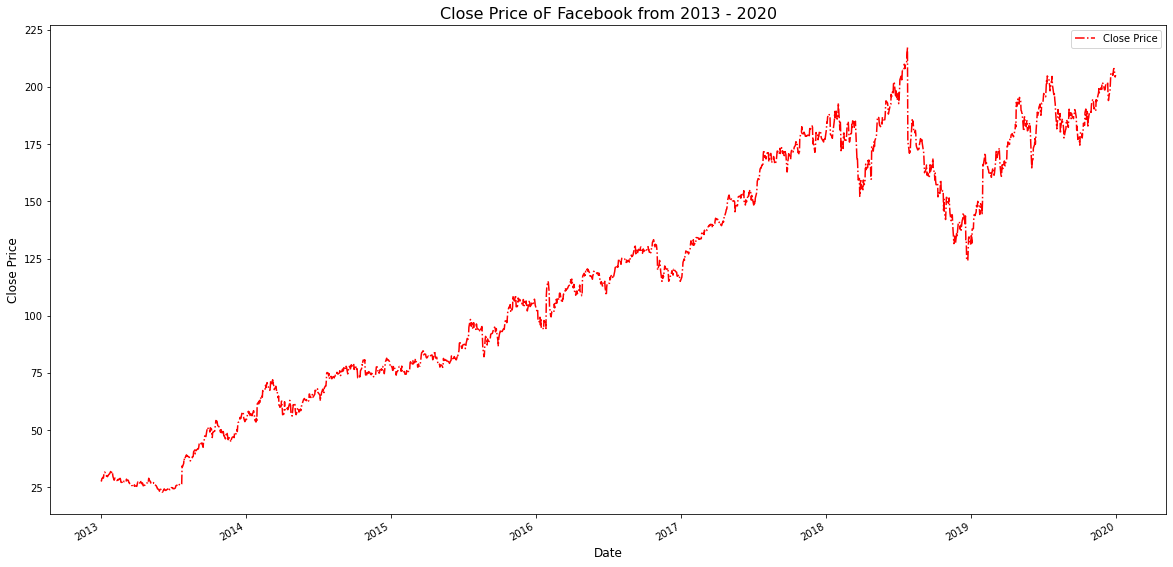

In [5]:
#extract the close price
close = fb['Close']
#take a look at the close price
plt.figure(figsize = (20, 10))
close.plot(color = 'r', linestyle = '-.', label = 'Close Price')
plt.title("Close Price oF Facebook from 2013 - 2020", fontsize = '16')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price', fontsize = 12)
plt.legend()

### Write a library for SMA

In [6]:
def smacal(tsprice, k):
    sma = pd.Series([np.nan]*len(tsprice), index = tsprice.index)
    for i in range(k - 1, len(tsprice)):
        sma[i] = np.mean(tsprice[(i - k + 1) : (i + 1)])
    return (sma)

## Method 1: Crossover

In [12]:
#lets try MA10 and MA20
ma10 = smacal(close, 10)
ma20 = smacal(close, 20)
#concat the series together
table = pd.concat([close, ma10, ma20], axis = 1)
#change the name of columns
table.columns = ['Close', 'MA10', 'MA20']
#drop na
table = table.dropna()
#take a look at first 20 elements
table.head(20)

,Close,MA10,MA20
Date,,,
2013-01-30,31.240000,30.832,30.2995
2013-01-31,30.980000,30.945,30.4485
2013-02-01,29.730000,30.904,30.5465
2013-02-04,28.110001,30.749,30.5140
2013-02-05,28.639999,30.540,30.4750
2013-02-06,29.049999,30.363,30.4745
2013-02-07,28.650000,30.120,30.3775
2013-02-08,28.549999,29.821,30.2400
2013-02-11,28.260000,29.400,30.0670


In [20]:
#create a trading signal
table['Signal'] = [1 if table['MA10'][i] >= table['MA20'][i] else -1 for i in range(len(table.Close))]
table.head(20)

,Close,MA10,MA20,Signal
Date,,,,
2013-01-30,31.240000,30.832,30.2995,1
2013-01-31,30.980000,30.945,30.4485,1
2013-02-01,29.730000,30.904,30.5465,1
2013-02-04,28.110001,30.749,30.5140,1
2013-02-05,28.639999,30.540,30.4750,1
2013-02-06,29.049999,30.363,30.4745,-1
2013-02-07,28.650000,30.120,30.3775,-1
2013-02-08,28.549999,29.821,30.2400,-1
2013-02-11,28.260000,29.400,30.0670,-1


In [23]:
#define buy signal
buysig = [1]
for i in range(1, len(table['Close'])):
    if table['Signal'][i] == 1 and table['Signal'][i - 1] == -1:
        buysig.append(1)
    else:
        buysig.append(0)
print(buysig)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [24]:
#define sell signal
sellsig = [0]
for i in range(1, len(table['Close'])):
    if table['Signal'][i] == -1 and table['Signal'][i - 1] == 1:
        sellsig.append(1)
    else:
        sellsig.append(0)
print(sellsig)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
#add them to the dataframe
table['Buy Sig'] = buysig
table['Sell Sig'] = sellsig

In [27]:
table.head()

,Close,MA10,MA20,Signal,Buy Sig,Sell Sig
Date,,,,,,
2013-01-30,31.240000,30.832,30.2995,1,1,0
2013-01-31,30.980000,30.945,30.4485,1,0,0
2013-02-01,29.730000,30.904,30.5465,1,0,0
2013-02-04,28.110001,30.749,30.5140,1,0,0
2013-02-05,28.639999,30.540,30.4750,1,0,0


In [29]:
#recall the library we used
def trade(ret_series, signal):
    traderet = ret_series * signal.shift(1)
    traderet = traderet.dropna()
    return traderet

def Sharpe_Ratio(ret_series, rf):
    mean = (1 + ret_series).prod()**(1 / len(ret_series[ret_series != 0])) - 1
    std = np.std(ret_series) * len(ret_series) / len(ret_series[ret_series != 0])
    return (mean - rf) / std
    
def backtest(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """ #documetation string
    wealth_index = 10000*(1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth" : wealth_index,
        "Peaks" : previous_peaks,
        "Drawdown" : drawdowns
    })

In [30]:
#create return column
table['Return'] = table['Close']/table['Close'].shift(1) - 1
table.head()

,Close,MA10,MA20,Signal,Buy Sig,Sell Sig,Return
Date,,,,,,,
2013-01-30,31.240000,30.832,30.2995,1,1,0,NaN
2013-01-31,30.980000,30.945,30.4485,1,0,0,-0.008323
2013-02-01,29.730000,30.904,30.5465,1,0,0,-0.040349
2013-02-04,28.110001,30.749,30.5140,1,0,0,-0.054490
2013-02-05,28.639999,30.540,30.4750,1,0,0,0.018854


In [31]:
#generate the trade return
table['Trade Return'] = trade(table['Return'], table['Signal'])
table.head()

,Close,MA10,MA20,Signal,Buy Sig,Sell Sig,Return,Trade Return
Date,,,,,,,,
2013-01-30,31.240000,30.832,30.2995,1,1,0,NaN,NaN
2013-01-31,30.980000,30.945,30.4485,1,0,0,-0.008323,-0.008323
2013-02-01,29.730000,30.904,30.5465,1,0,0,-0.040349,-0.040349
2013-02-04,28.110001,30.749,30.5140,1,0,0,-0.054490,-0.054490
2013-02-05,28.639999,30.540,30.4750,1,0,0,0.018854,0.018854


In [32]:
#create backtest result
trade_result = backtest(table['Trade Return'])
stock_result = backtest(table['Return'])

Text(0.5, 0, 'Date')

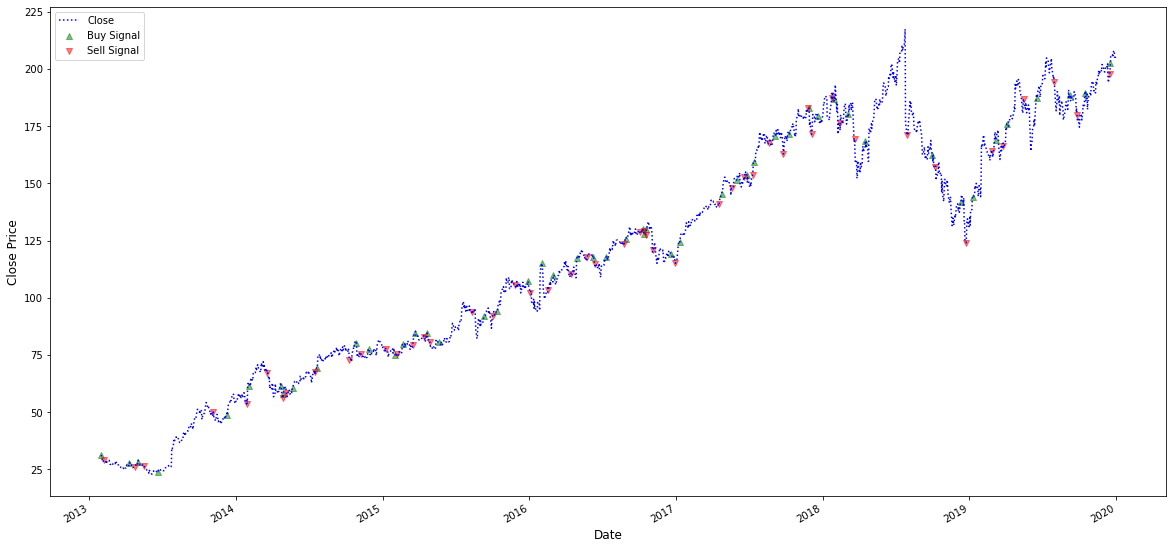

In [38]:
#plot the signals
table['Close'].plot(figsize = (20, 10), color = 'b', linestyle = ':')
plt.scatter(table['Close'][table['Buy Sig'] == 1].index, table['Close'][table['Buy Sig'] == 1], marker = '^', color = 'g', label = 'Buy Signal', alpha = 0.5)
plt.scatter(table['Close'][table['Sell Sig'] == 1].index, table['Close'][table['Sell Sig'] == 1], marker = 'v', color = 'r', label = 'Sell Signal', alpha = 0.5)
plt.legend()
plt.ylabel('Close Price', fontsize = 12)
plt.xlabel('Date', fontsize = 12)

Text(0.5, 1.0, 'Backtest Result of Crossover Stragety')

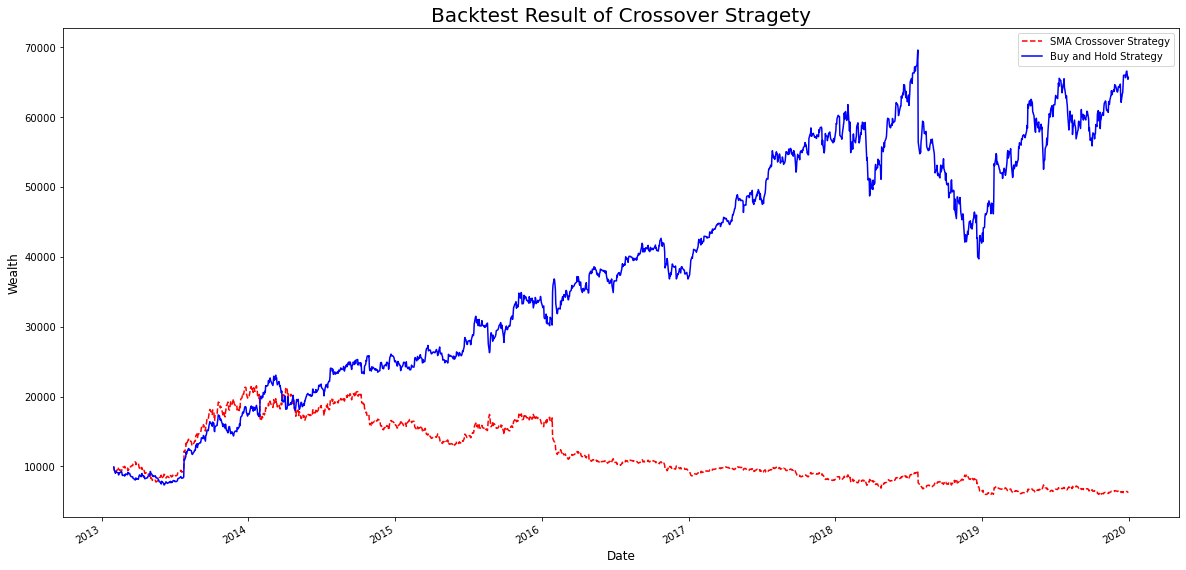

In [42]:
#plot the backtest results
trade_result['Wealth'].plot(figsize = (20, 10), linestyle = '--', color = 'r', label = 'SMA Crossover Strategy')
stock_result['Wealth'].plot(linestyle = '-', color = 'b', label = 'Buy and Hold Strategy')
plt.legend()
plt.ylabel('Wealth', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Backtest Result of Crossover Stragety', fontsize = 20)

### From the above graph, we figure out that SMA crossover doesn't even help us to capture profits and incur a loss for us in the long run

In [43]:
#conduct some statistical analysis
accuracy = len(table['Trade Return'][table['Trade Return'] > 0]) / len(table['Trade Return'][table['Trade Return'] != 0])
accuracy

0.49193548387096775

In [46]:
expectedwin = table['Trade Return'][table['Trade Return'] > 0].mean()
expectedloss = -table['Trade Return'][table['Trade Return'] < 0].mean() 

In [47]:
expectedwin, expectedloss

(0.013605002841566861, 0.013298771276519456)

In [48]:
expected_value = accuracy * expectedwin - (1 - accuracy) * expectedloss
expected_value

-6.385013778344509e-05

In [74]:
#assume 0 riskfree rate
sr = Sharpe_Ratio(table['Trade Return'], 0)
sr

-0.012899934772014536

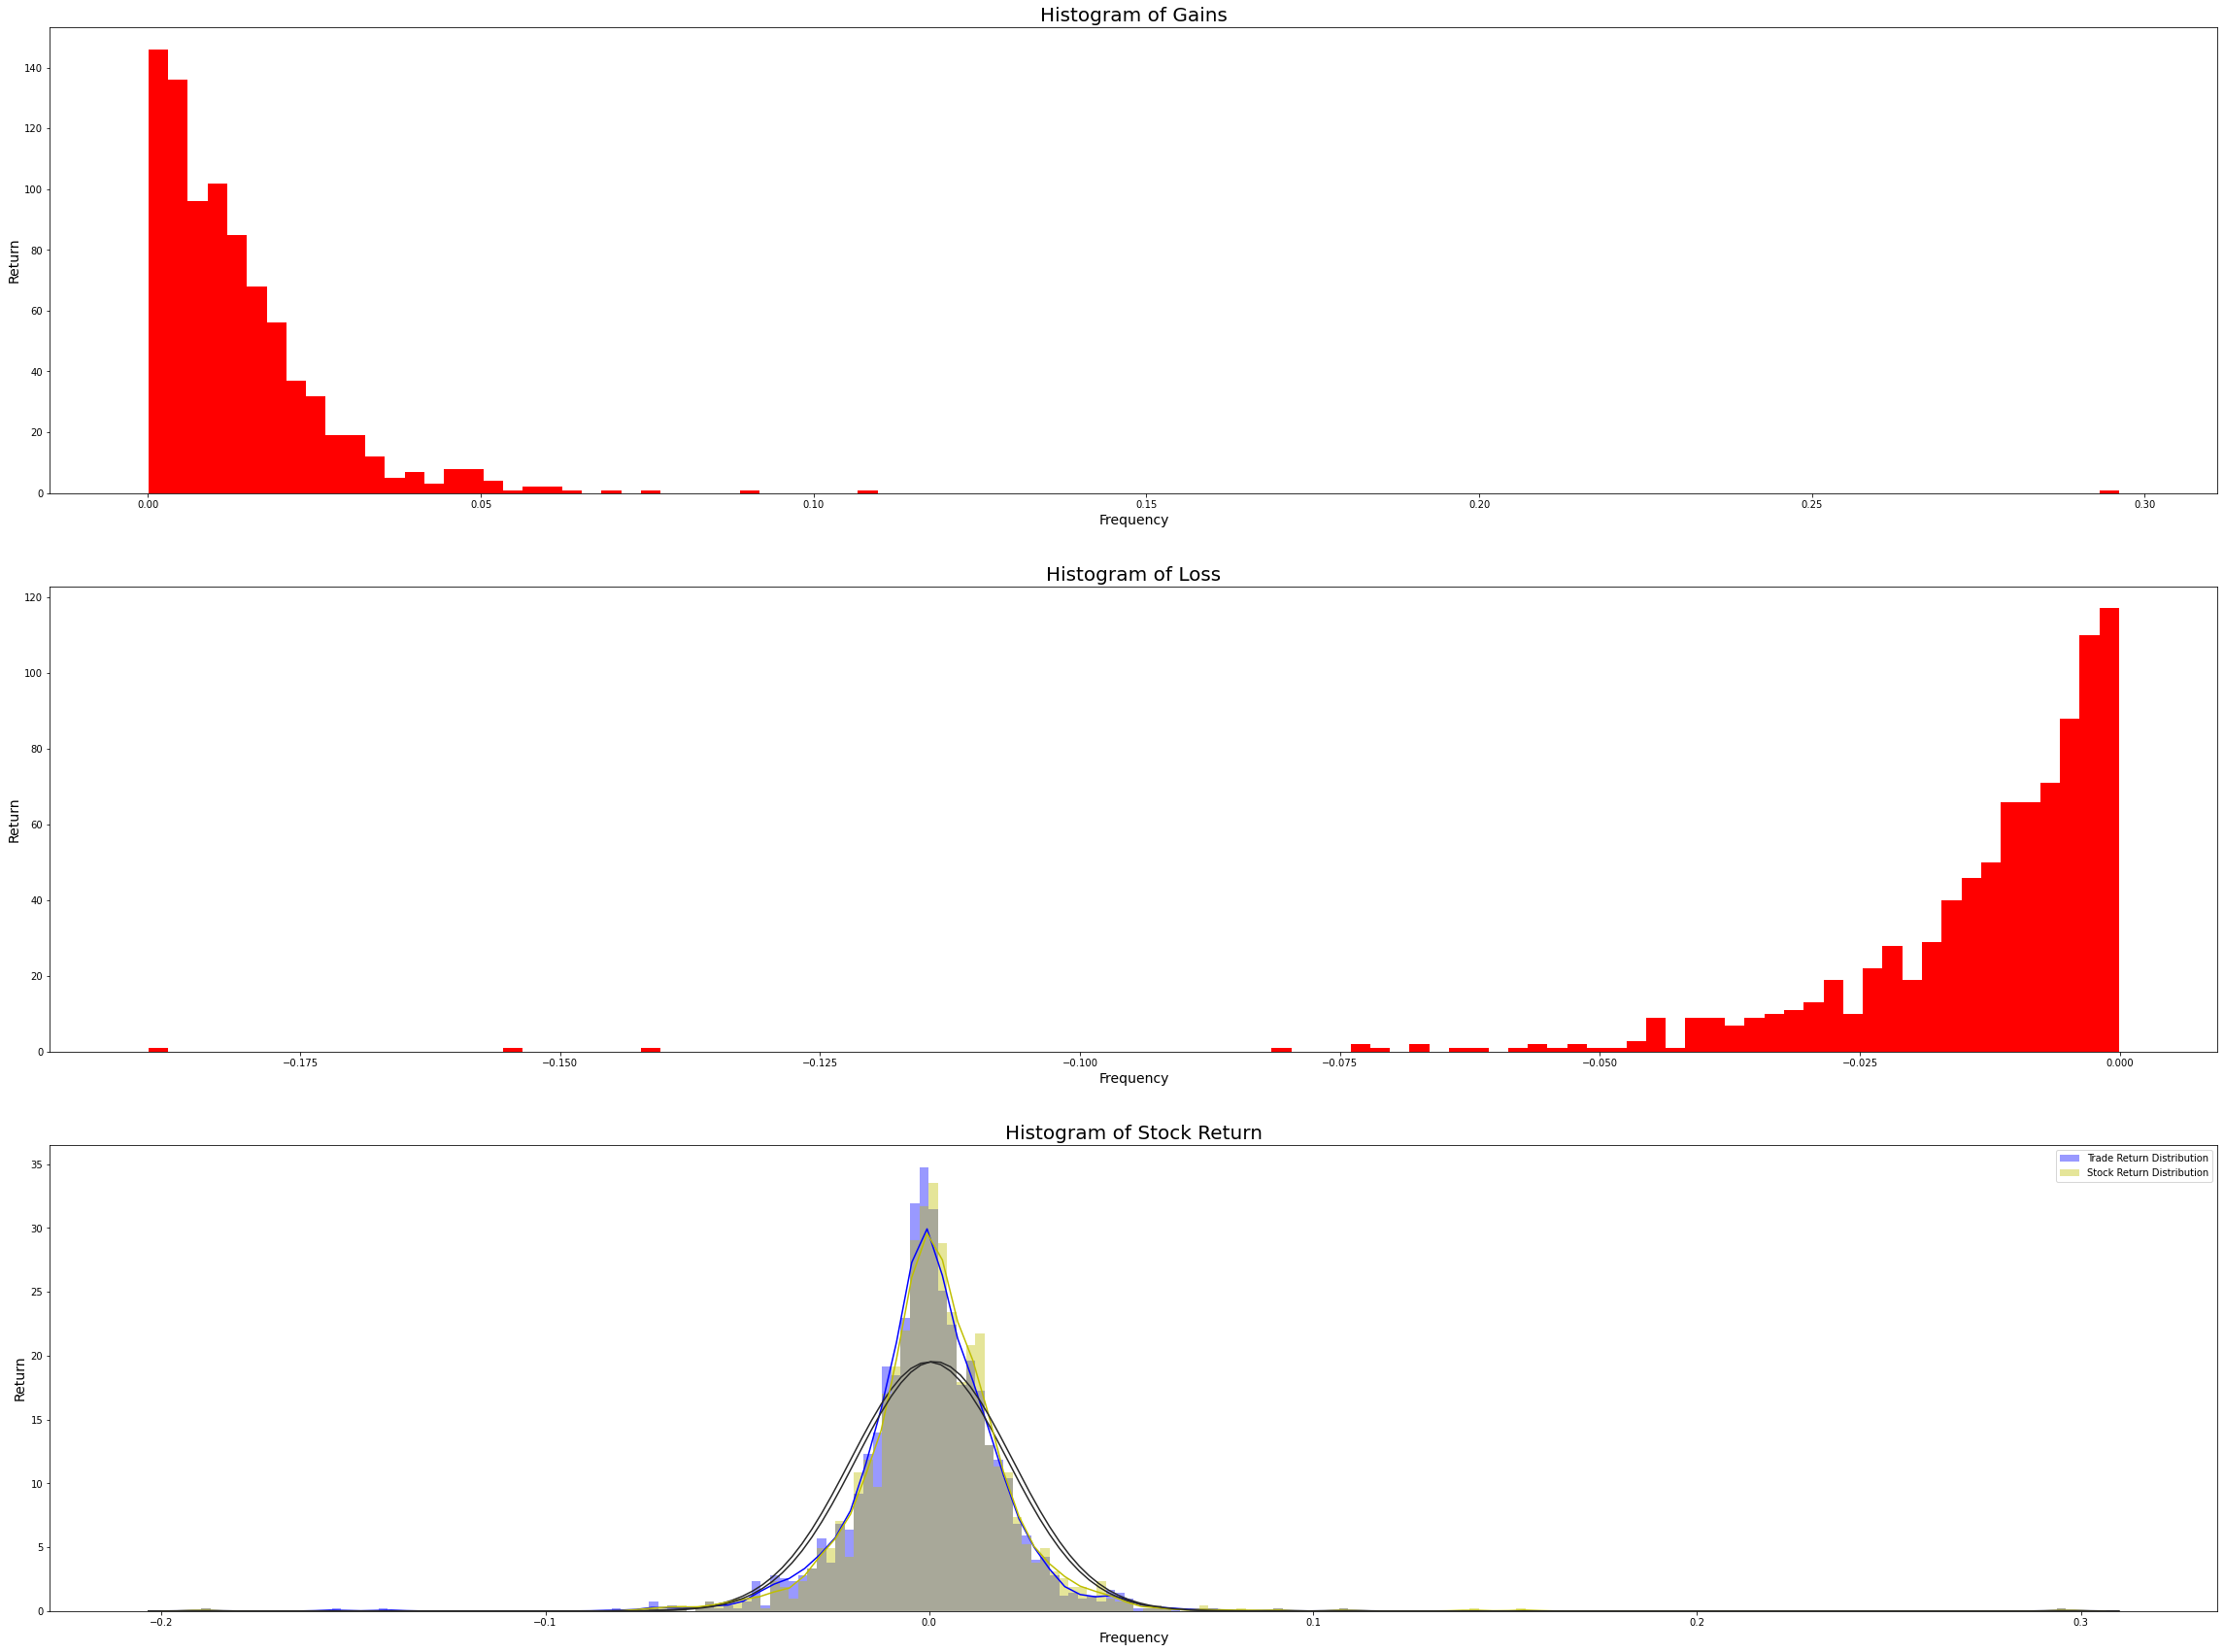

In [65]:
#histogram of reutn
import seaborn as sns
from scipy import stats
plt.figure(figsize = (40, 30))
plt.subplot(311)
plt.hist(table['Trade Return'][table['Trade Return'] > 0], color = 'r', bins = 100)
plt.title("Histogram of Gains", fontsize = 20)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Return', fontsize = 14)
plt.subplot(312)
plt.hist(table['Trade Return'][table['Trade Return'] < 0], color = 'r', bins = 100)
plt.title("Histogram of Loss", fontsize = 20)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Return', fontsize = 14)
plt.subplot(313)
sns.distplot(table['Trade Return'], fit = stats.norm, bins = 200, color = 'b', label = 'Trade Return Distribution')
plt.title("Histogram of Overall Trade Return", fontsize = 20)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Return', fontsize = 14)
sns.distplot(table['Return'], fit = stats.norm, bins = 200, color = 'y', label = 'Stock Return Distribution')
plt.title("Histogram of Stock Return", fontsize = 20)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Return', fontsize = 14)
plt.legend()


## Method 2: Trend Filtering

In [66]:
#let's try with 20 MA as trend filtering
table.head()

,Close,MA10,MA20,Signal,Buy Sig,Sell Sig,Return,Trade Return
Date,,,,,,,,
2013-01-30,31.240000,30.832,30.2995,1,1,0,NaN,NaN
2013-01-31,30.980000,30.945,30.4485,1,0,0,-0.008323,-0.008323
2013-02-01,29.730000,30.904,30.5465,1,0,0,-0.040349,-0.040349
2013-02-04,28.110001,30.749,30.5140,1,0,0,-0.054490,-0.054490
2013-02-05,28.639999,30.540,30.4750,1,0,0,0.018854,0.018854


In [67]:
#create new dataframe for second test
table2 = pd.concat([table['Close'], table['MA20']], axis = 1)
table2.head()

,Close,MA20
Date,,
2013-01-30,31.240000,30.2995
2013-01-31,30.980000,30.4485
2013-02-01,29.730000,30.5465
2013-02-04,28.110001,30.5140
2013-02-05,28.639999,30.4750


In [70]:
table2['Signal'] = [1 if table2['Close'][i] > table['MA20'][i] else -1 for i in range(len(table2['Close']))]
table2.head()

,Close,MA20,Signal
Date,,,
2013-01-30,31.240000,30.2995,1
2013-01-31,30.980000,30.4485,1
2013-02-01,29.730000,30.5465,-1
2013-02-04,28.110001,30.5140,-1
2013-02-05,28.639999,30.4750,-1


In [71]:
#define buy signal
buysig = [1]
for i in range(1, len(table2['Close'])):
    if table2['Signal'][i] == 1 and table2['Signal'][i - 1] == -1:
        buysig.append(1)
    else:
        buysig.append(0)
print(buysig)
#define sell signal
sellsig = [0]
for i in range(1, len(table2['Close'])):
    if table2['Signal'][i] == -1 and table2['Signal'][i - 1] == 1:
        sellsig.append(1)
    else:
        sellsig.append(0)
print(sellsig)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 

In [72]:
#add them to the dataframe
table2['Buy Sig'] = buysig
table2['Sell Sig'] = sellsig
table2.head()

,Close,MA20,Signal,Buy Sig,Sell Sig
Date,,,,,
2013-01-30,31.240000,30.2995,1,1,0
2013-01-31,30.980000,30.4485,1,0,0
2013-02-01,29.730000,30.5465,-1,0,1
2013-02-04,28.110001,30.5140,-1,0,0
2013-02-05,28.639999,30.4750,-1,0,0


In [77]:
#create trade return
table2['Return'] = table['Return']
table2['Trade Return'] = trade(table2['Return'], table2['Signal'])
table2.head()

,Close,MA20,Signal,Buy Sig,Sell Sig,Return,Trade Return
Date,,,,,,,
2013-01-30,31.240000,30.2995,1,1,0,NaN,NaN
2013-01-31,30.980000,30.4485,1,0,0,-0.008323,-0.008323
2013-02-01,29.730000,30.5465,-1,0,1,-0.040349,-0.040349
2013-02-04,28.110001,30.5140,-1,0,0,-0.054490,0.054490
2013-02-05,28.639999,30.4750,-1,0,0,0.018854,-0.018854


In [82]:
#create backtest result
trade_result = backtest(table2['Trade Return'])
stock_result = backtest(table2['Return'])

Text(0.5, 0, 'Date')

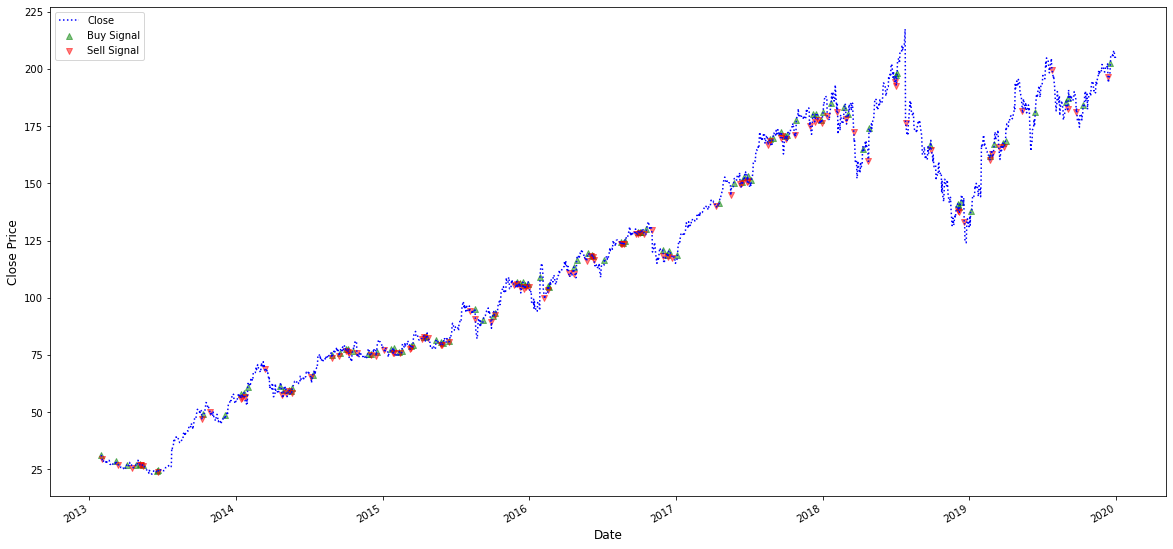

In [83]:
#plot the signals
table2['Close'].plot(figsize = (20, 10), color = 'b', linestyle = ':')
plt.scatter(table2['Close'][table2['Buy Sig'] == 1].index, table2['Close'][table2['Buy Sig'] == 1], marker = '^', color = 'g', label = 'Buy Signal', alpha = 0.5)
plt.scatter(table2['Close'][table2['Sell Sig'] == 1].index, table2['Close'][table2['Sell Sig'] == 1], marker = 'v', color = 'r', label = 'Sell Signal', alpha = 0.5)
plt.legend()
plt.ylabel('Close Price', fontsize = 12)
plt.xlabel('Date', fontsize = 12)

Text(0.5, 1.0, 'Backtest Result of Trend-filtering Stragety')

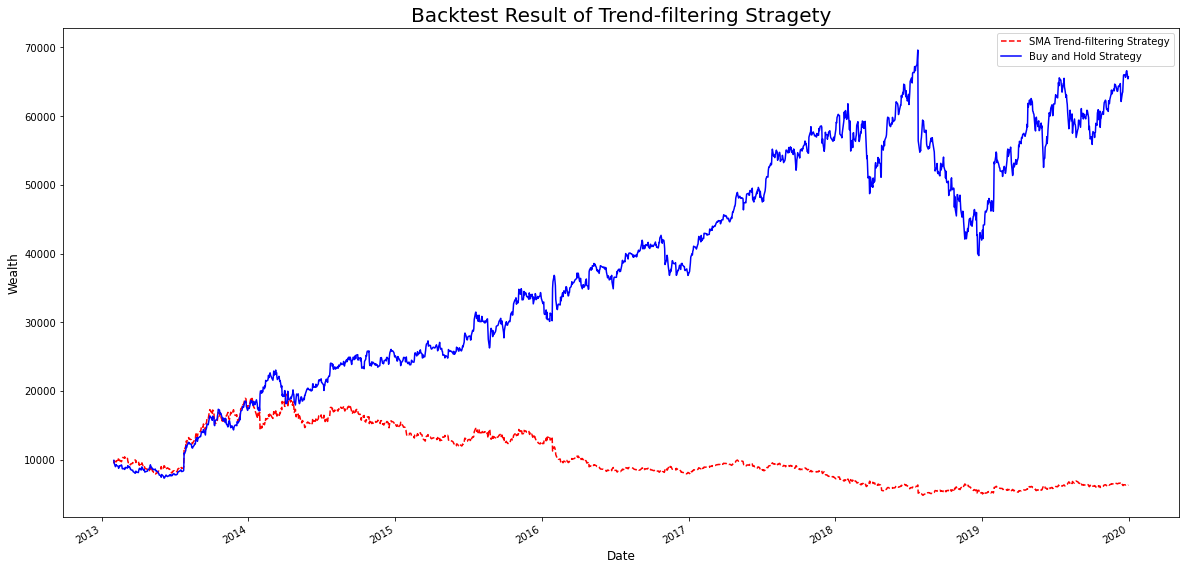

In [84]:
#plot the backtest results
trade_result['Wealth'].plot(figsize = (20, 10), linestyle = '--', color = 'r', label = 'SMA Trend-filtering Strategy')
stock_result['Wealth'].plot(linestyle = '-', color = 'b', label = 'Buy and Hold Strategy')
plt.legend()
plt.ylabel('Wealth', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Backtest Result of Trend-filtering Stragety', fontsize = 20)

### According to above experiment, we may see that 20MA doesn't have any trend filtering ability for us to trade